In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))

In [2]:
import torch
import numpy as np
import torchvision.transforms as transforms
import seaborn as sns
import ristretto.activations as ra
import ristretto.models as rm
import ristretto.utils as ru
import pandas as pd

from functools import partial
# from torch.utils.tensorboard import SummaryWriter

In [3]:
# set pytorch precision
torch.set_default_tensor_type(torch.FloatTensor)
torch.set_default_dtype(torch.float32)

In [3]:
# activate 
ra.ReLUFunction.print_when_zero = True

In [5]:
models = [
    rm.mobilenet_v3_small(activation=partial(ra.ReLU, 0), seed=12345),
    rm.mobilenet_v3_small(activation=partial(ra.ReLU, 0), seed=12345),
    rm.mobilenet_v3_small(activation=partial(ra.ReLU, 1), seed=12345)
]

In [6]:
metrics = ru.train_multiple_models(
    models,
    ru.default.DATA_LOADERS['MNIST'],
    data_loader_transform=transforms.Compose([
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor()
    ]),
    epochs=2,
    metrics_fn=lambda m, p, y: {"weight_sum": ru.get_weight_sum(m)},
    seed=ru.default.SEED,
    verbose=False
)

===== Model 1 (MobileNetV3) =====
---------- Epoch 1 ----------
Validation
    loss:     3.131e+00
    accuracy: 25.94
---------- Epoch 2 ----------
Validation
    loss:     1.093e-01
    accuracy: 96.72

===== Model 2 (MobileNetV3) =====
---------- Epoch 1 ----------
Validation
    loss:     3.131e+00
    accuracy: 25.94
---------- Epoch 2 ----------
Validation
    loss:     1.093e-01
    accuracy: 96.72

===== Model 3 (MobileNetV3) =====
---------- Epoch 1 ----------
Validation
    loss:     3.131e+00
    accuracy: 25.94
---------- Epoch 2 ----------
Validation
    loss:     1.093e-01
    accuracy: 96.72



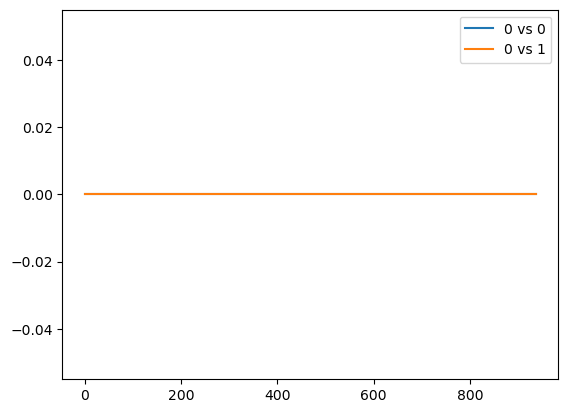

In [7]:
diff = pd.DataFrame({
    "0 vs 0": np.abs(metrics[0]["train"]['weight_sum'] - metrics[1]["train"]['weight_sum']),
    "0 vs 1": np.abs(metrics[0]["train"]['weight_sum'] - metrics[2]["train"]['weight_sum'])
})
sns.lineplot(data=diff, dashes=False);

### When trained with 16-bit precision the difference between the models is even greater

In [4]:
# set pytorch precision
torch.set_default_tensor_type(torch.FloatTensor)
torch.set_default_dtype(torch.bfloat16)

In [5]:
models = [
    rm.mobilenet_v3_small(activation=partial(ra.ReLU6, 0, 0), seed=12345),
    rm.mobilenet_v3_small(activation=partial(ra.ReLU6, 0, 0), seed=12345),
    rm.mobilenet_v3_small(activation=partial(ra.ReLU6, 1, 0), seed=12345)
]

In [6]:
metrics = ru.train_multiple_models(
    models,
    ru.default.DATA_LOADERS['MNIST'],
    data_loader_transform=transforms.Compose([
        transforms.Grayscale(num_output_channels=3),
        transforms.ToTensor()
    ]),
    epochs=2,
    metrics_fn=lambda m, p, y: {"weight_sum": ru.get_weight_sum(m)},
    seed=ru.default.SEED,
    verbose=True
)

===== Model 1 (MobileNetV3) =====
---------- Epoch 1 ----------
Training [    0/60000]
    batch loss:     6.906e+00
    batch accuracy: 0.00
Training [12800/60000]
    batch loss:     3.926e-01
    batch accuracy: 86.72
Training [25600/60000]
    batch loss:     2.119e-01
    batch accuracy: 95.31
Training [38400/60000]
    batch loss:     1.709e-01
    batch accuracy: 96.09
Training [51200/60000]
    batch loss:     2.061e-01
    batch accuracy: 92.97
Validation
    loss:     3.243e+00
    accuracy: 9.74
---------- Epoch 2 ----------
Training [    0/60000]
    batch loss:     1.138e-01
    batch accuracy: 96.88
Training [12800/60000]
    batch loss:     1.025e-01
    batch accuracy: 95.31
Training [25600/60000]
    batch loss:     7.812e-02
    batch accuracy: 97.66
Training [38400/60000]
    batch loss:     1.514e-01
    batch accuracy: 94.53
Training [51200/60000]
    batch loss:     1.689e-01
    batch accuracy: 94.53
Validation
    loss:     3.746e-01
    accuracy: 92.89

===== M

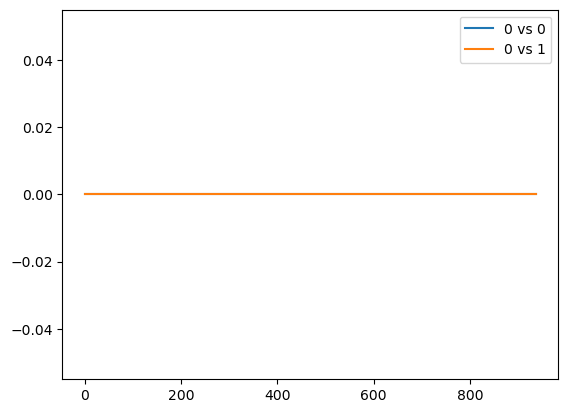

In [7]:
diff = pd.DataFrame({
    "0 vs 0": np.abs(metrics[0]["train"]['weight_sum'] - metrics[1]["train"]['weight_sum']),
    "0 vs 1": np.abs(metrics[0]["train"]['weight_sum'] - metrics[2]["train"]['weight_sum'])
})
sns.lineplot(data=diff, dashes=False);